## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Kelvin Waters
# Online FT 12/09/19 cohort
# Once submitted
# Rafael Carrasco

In [1]:
# import everything being used up top
from importlib import reload

import sqlite3
import pandas as pd
import numpy as np
import helper_functions as hf


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
reload(hf)

<module 'helper_functions' from 'C:\\Users\\kelvi\\flatiron\\section01\\dsc-mod-1-project-v2-1-online-ds-ft-120919\\helper_functions.py'>

In [3]:
def preview_tables(conn, tables='all'):
    all_tables = hf.get_table_list(conn)
    if tables=='all':
        final_table_names = all_tables
        
    elif type(tables) == list:
        final_table_names = [t for t in all_tables if t in tables]
    
    for table_name in final_table_names:
        print(f"Showing Table: {table_name}")
        query = f"select * from {table_name};"
        df = pd.read_sql(query, conn)
        display(df.head(2))
        print("-"*100)
    print("finished")
    return None

In [4]:
conn = sqlite3.Connection("movies_db.sqlite")
c = conn.cursor()

In [5]:
table_names = hf.get_table_list(conn)
table_names

['bom_movie_gross',
 'name_basics',
 'title_akas',
 'title_basics',
 'title_crew',
 'title_principals',
 'title_ratings',
 'tmdb_movies',
 'tn_movie_budgets']

In [6]:
preview_tables(conn, tables= 'all')

Showing Table: bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


----------------------------------------------------------------------------------------------------
Showing Table: name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


----------------------------------------------------------------------------------------------------
Showing Table: title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0


----------------------------------------------------------------------------------------------------
Showing Table: title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


----------------------------------------------------------------------------------------------------
Showing Table: title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"


----------------------------------------------------------------------------------------------------
Showing Table: title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None


----------------------------------------------------------------------------------------------------
Showing Table: title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


----------------------------------------------------------------------------------------------------
Showing Table: tmdb_movies


,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


----------------------------------------------------------------------------------------------------
Showing Table: tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


----------------------------------------------------------------------------------------------------
finished


# Top 5 domestic profitable studios

In [31]:
# WORKING CELL
# (3387, 5)
# title              object
# studio             object
# domestic_gross    float64
# foreign_gross      object
# year                int64
# title                0
# studio               5
# domestic_gross      28
# foreign_gross     1350
# year                 0

bom_movie_gross_df = hf.load_table(conn, "bom_movie_gross")
bom_movie_gross_df.foreign_gross.describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

In [8]:
# foriegn values on this table exceed 30 percent
# will have to find other data to add that information for each studio
# that's global.
# values too large for plotting
# both of the values I need are on the same table
c.execute("""SELECT title, 
        studio, 
        SUM(domestic_gross)
        FROM bom_movie_gross
        GROUP BY studio
        ORDER BY SUM(domestic_gross) DESC
        """)
bom_movie_gross_df = pd.DataFrame(c.fetchall())
bom_movie_gross_df.columns = [x[0] for x in c.description]
bom_movie_gross_df.head()

,title,studio,SUM(domestic_gross)
0,Toy Story 3,BV,1.841903e+10
1,Despicable Me,Uni.,1.290239e+10
2,Harry Potter and the Deathly Hallows Part 1,WB,1.216805e+10
3,The Chronicles of Narnia: The Voyage of the Da...,Fox,1.094950e+10
4,The Karate Kid,Sony,8.459683e+09


In [9]:
# domestic_gross boxplot
# outliars hard to indentify with matplotlib and the large values in 
# this column

bom_movie_gross_df.domestic_gross.plot(kind='box')

AttributeError: 'DataFrame' object has no attribute 'domestic_gross'

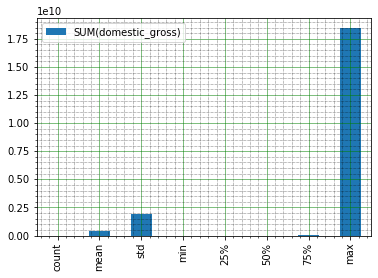

In [10]:
topfive = bom_movie_gross_df.describe()
topfive.plot(kind='bar')
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

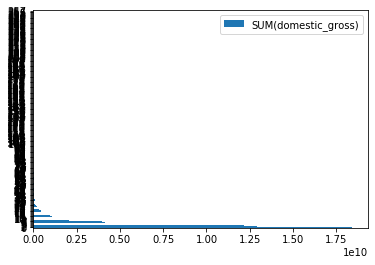

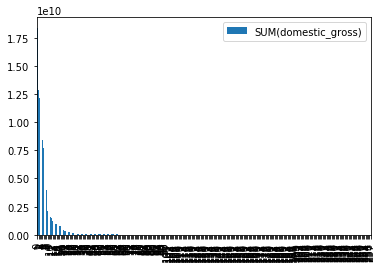

In [11]:
# line plotting is to show some value over time/duration not a 
# valid option for what I'm attempting to achieve since the data
# isn't time sensitive.
# these values are too large!
bom_movie_gross_df.plot(kind='barh', stacked=True)
bom_movie_gross_df.plot(kind='bar', stacked=True)
plt.show()

# Adverage rating, numvotes, and genres

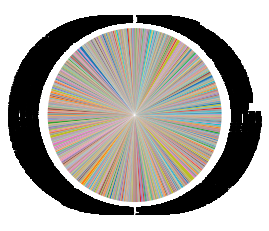

In [12]:
# WORKING CELL
# Original table data
# (73856, 3)
# tconst            object
# averagerating    float64
# numvotes           int64
# tconst           0
# averagerating    0
# numvotes         0

title_ratings_df = hf.load_table(conn, "title_ratings")
title_ratings_df.numvotes.plot(kind='pie')

In [13]:
# WORKING CELL
# Original table data
# (146144, 6)
# tconst              object
# primary_title       object
# original_title      object
# start_year           int64
# runtime_minutes    float64
# genres              object
# tconst                 0
# primary_title          0
# original_title        21
# start_year             0
# runtime_minutes    31739
# genres              5408

title_basics_df = hf.load_table(conn, "title_basics")
title_basics_df.runtime_minutes.describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

# getting the data

In [14]:
# obtaining the data i'm looking for

c.execute("""SELECT tconst,
        averagerating,
        numvotes
        FROM title_ratings
        """)
title_ratings_df = pd.DataFrame(c.fetchall())
title_ratings_df.columns = [x[0] for x in c.description]
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
# obtaining the data I'm looking for

c.execute("""SELECT tconst,
        primary_title,
        genres
        FROM title_basics
        """)
title_basics_df = pd.DataFrame(c.fetchall())
title_basics_df.columns = [x[0] for x in c.description]
title_basics_df.head()

,tconst,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [16]:
# RangeIndex: 146144 entries, 0 to 146143
# Data columns (total 3 columns):
# tconst           146144 non-null object
# primary_title    146144 non-null object
# genres           140736 non-null object
# dtypes: object(3)
# tconst                 0
# primary_title          0
# runtime_minutes    31739
# genres              5408
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst           146144 non-null object
primary_title    146144 non-null object
genres           140736 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [17]:
merged_titles = pd.merge(title_basics_df, title_ratings_df, on ='tconst')
merged_titles.head()

,tconst,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119


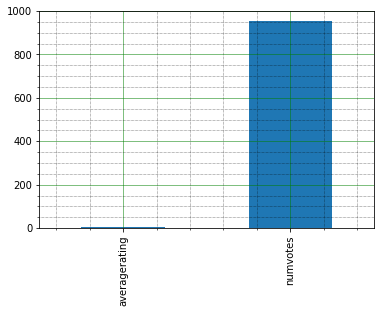

In [18]:
mt = merged_titles.head().mean()
mt.plot(kind='bar')
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

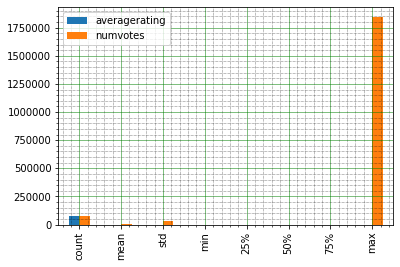

In [19]:
mtd = merged_titles.describe()
mtd.plot(kind='bar')
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

# Question # 3 popularity & domestic gross

In [20]:
# show the value and/ or correalation of movie popularity 
# and profitability, attempt to tie this back to the studio
# that owns this production
# Original table data
# (5782, 6)
# id                    int64
# release_date         object
# movie                object
# production_budget    object
# domestic_gross       object
# worldwide_gross      object
# id                   0
# release_date         0
# movie                0
# production_budget    0
# domestic_gross       0
# worldwide_gross      0

tn_movie_budgets_df = hf.load_table(conn, "tn_movie_budgets")
tn_movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [21]:
# Original table data
# (26517, 10)
# index                  int64
# genre_ids             object
# id                     int64
# original_language     object
# original_title        object
# popularity           float64
# release_date          object
# title                 object
# vote_average         float64
# vote_count             int64
# index                0
# genre_ids            0
# id                   0
# original_language    0
# original_title       0
# popularity           0
# release_date         0
# title                0
# vote_average         0
# vote_count           0

tmdb_movies_df = hf.load_table(conn, "tmdb_movies")
tmdb_movies_df.isna().sum()

index                0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [22]:
# convert to int64 helper function
tn_movie_budgets_df = hf.load_table(conn, "tn_movie_budgets")

In [23]:
# convert dollars to integers
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    tn_movie_budgets_df = hf.convert_dollars_to_int(tn_movie_budgets_df, col)

In [24]:
# c.execute("""SELECT id,
#         movie,
#         production_budget,
#         domestic_gross,
#         worldwide_gross
#         FROM tn_movie_budgets
#         """)
# tn_movie_budgets_df = pd.DataFrame(c.fetchall())
# tn_movie_budgets_df.columns = [x[0] for x in c.description]
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [25]:
# RangeIndex: 5782 entries, 0 to 5781
# Data columns (total 5 columns):
# id                   5782 non-null int64
# movie                5782 non-null object
# production_budget    5782 non-null object
# domestic_gross       5782 non-null object
# worldwide_gross      5782 non-null object
# dtypes: int64(1), object(4)
# id                   0
# movie                0
# production_budget    0
# domestic_gross       0
# worldwide_gross      0
tn_movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [26]:
c.execute("""SELECT id,
        popularity,
        vote_average,
        vote_count
        FROM tmdb_movies
        """)
tmdb_movies_df = pd.DataFrame(c.fetchall())
tmdb_movies_df.columns = [x[0] for x in c.description]
tmdb_movies_df.head()

,id,popularity,vote_average,vote_count
0,12444,33.533,7.7,10788
1,10191,28.734,7.7,7610
2,10138,28.515,6.8,12368
3,862,28.005,7.9,10174
4,27205,27.920,8.3,22186


In [27]:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 26517 entries, 0 to 26516
# Data columns (total 4 columns):
# id              26517 non-null int64
# popularity      26517 non-null float64
# vote_average    26517 non-null float64
# vote_count      26517 non-null int64
# dtypes: float64(2), int64(2)
# id              0
# popularity      0
# vote_average    0
# vote_count      0
# dtype: int64
tmdb_movies_df.isna().sum()

id              0
popularity      0
vote_average    0
vote_count      0
dtype: int64

In [28]:
# to_concast abandoned, recommended join, found merge works even better 
# thus far, only took a day!
merged_tn_tmdb = pd.merge(tn_movie_budgets_df, tmdb_movies_df, on ='id')
merged_tn_tmdb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count
0,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,10.332,4.9,170
1,27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673,10.332,4.9,170
2,27,"Dec 25, 2015",The Revenant,135000000,183637894,532938302,10.332,4.9,170
3,27,"Dec 17, 2004",The Aviator,110000000,102608827,208370892,10.332,4.9,170
4,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,94000000,342548984,934699645,10.332,4.9,170


In [29]:
# popularity
# 10.332    6.170282e+07
# 12.063    4.020330e+07
# 12.710    4.716445e+07
# 15.067    4.036715e+07
# 15.799    3.571045e+07
# Name: domestic_gross, dtype: float64
# reversed axis?! 
mttd = merged_tn_tmdb.groupby('vote_average')['domestic_gross'].describe()

In [30]:
# popularity and domestic gross
mtt.plot(kind='bar')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

NameError: name 'mtt' is not defined

In [ ]:
#vote average , domestic gross
mtt2.plot(kind='bar')
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

In [ ]:
# descriptive plot between merged values
# describe
mttd.plot(kind='bar')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()